# Visualising data

**NOTE**: most of this session has been adapted from:

* The `seaborn` tutorial:

> [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html)

* Choropleths lab on GDS'17:

> [http://darribas.org/gds17/labs/Lab_03.html](http://darribas.org/gds17/labs/Lab_03.html)

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

db = pd.read_csv('data/analysis_ready.csv.gz')

## Univariate views

### Bar charts

In [3]:
rt_count = db.groupby('room_type').size()
rt_count

room_type
Entire home/apt    27175
Private room       26019
Shared room          710
dtype: int64

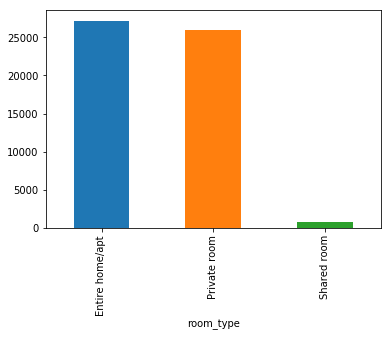

In [4]:
rt_count.plot.bar();

To note:

- Application of `groupby`
- Grammar is `.plot.bar`
- End line with `;` to avoid matplotlib print

### Line charts

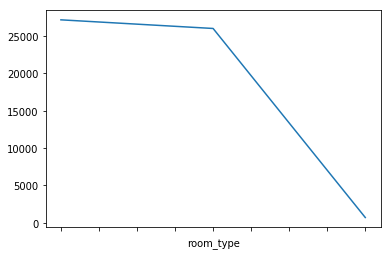

In [5]:
rt_count.plot.line();

To note:

* Similar syntax
* Just because you can, it doesn't mean you should! Meaning of lines

### Time series

In [6]:
t = pd.Series(1, index=pd.to_datetime(db['last_review']))

wkl = t.resample('w').sum()
wkl.head()

last_review
2011-05-15    1
2011-05-22    0
2011-05-29    0
2011-06-05    0
2011-06-12    0
dtype: int64

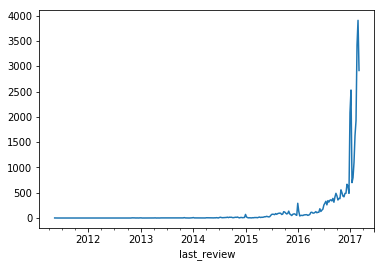

In [7]:
wkl.plot.line()

To note:

* We build `t` to have a "timestamped" count of events
* Then use `resample` to aggregate at the weekly (`w`) level
* `resample` grammar is similar to that in `groupby`: perform aggregation then apply method
* Plotting grammar: `plot.XXX()`

### Histograms and Kernel Density

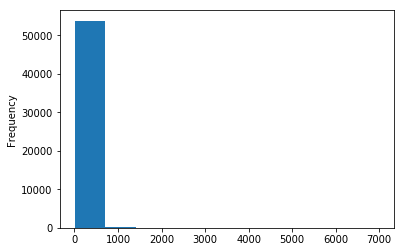

In [8]:
db['price_cleansed'].plot.hist()

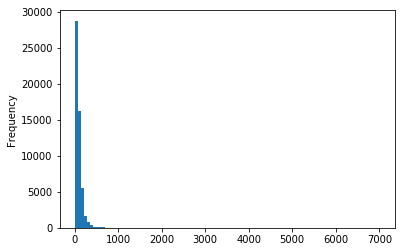

In [9]:
db['price_cleansed'].plot.hist(bins=100);

To note:

* Arguments to custom plot (e.g. `bins`)

### Spatial data

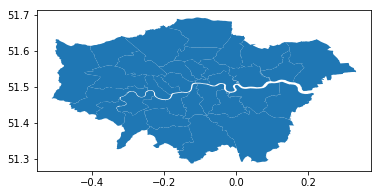

In [10]:
neis = gpd.read_file('data/neighbourhoods.geojson')

neis.plot();

---

**Exercise**

- Create a bar chart of the number of properties by property type
- Explore the distribution of the different review scores

## Bivariate views

### Scatter plots

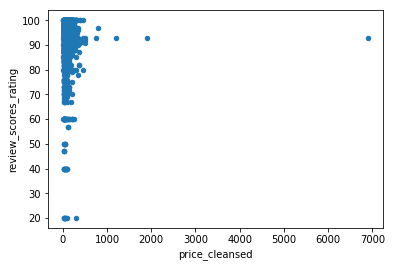

In [11]:
hack = db.loc[db['neighbourhood_cleansed']=='Hackney', :]
hack.plot.scatter(x='price_cleansed', 
                y='review_scores_rating');

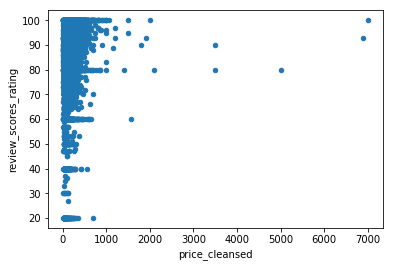

In [12]:
db.plot.scatter(x='price_cleansed', 
                y='review_scores_rating');

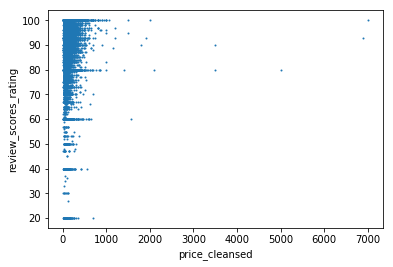

In [13]:
db.plot.scatter(x='price_cleansed', 
                y='review_scores_rating',
                s=1);

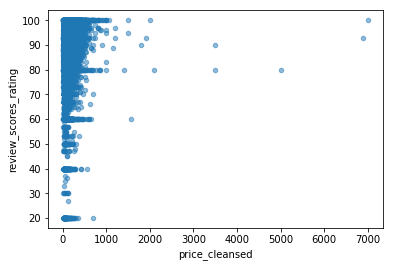

In [14]:
db.plot.scatter(x='price_cleansed', 
                y='review_scores_rating',
                alpha=0.5);

To note:

* Peak into correlation
* Runs into problems if too many dots

### Hexbin plots

C:\Users\Eugeni\Anaconda3\envs\gds\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


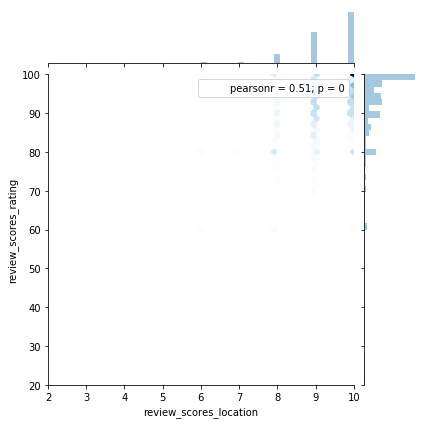

In [15]:
sns.jointplot(x='review_scores_location', 
              y='review_scores_rating',
              kind='hex',
              data=db)

### Contour plots and density surfaces

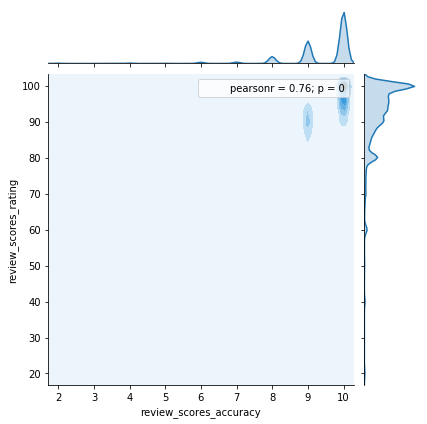

In [16]:
sns.jointplot(x='review_scores_accuracy', 
              y='review_scores_rating',
              kind='kde',
              data=db)

**Exercise**

- Create a bivariate visualization of `longitude` and `latitude`
- Explore bivariate distributions between the different review scores

### Categorical visualization

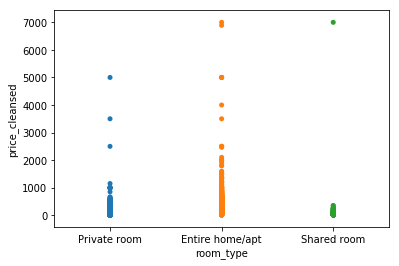

In [17]:
sns.stripplot(x='room_type', y='price_cleansed', data=db);

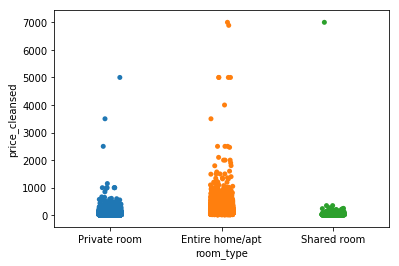

In [18]:
sns.stripplot(x='room_type', y='price_cleansed', data=db,
              jitter=True);

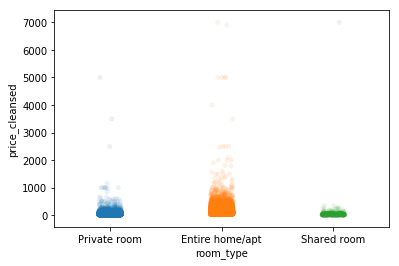

In [19]:
sns.stripplot(x='room_type', y='price_cleansed', data=db,
              jitter=True, alpha=0.1);

In [20]:
city = db.loc[db['neighbourhood_cleansed']=='City of London', :]
city.shape

(306, 20)

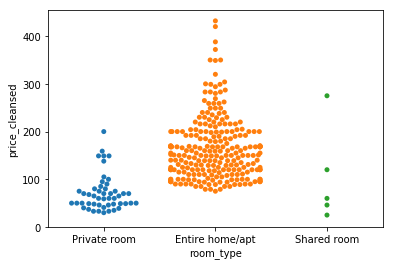

In [21]:
sns.swarmplot(x='room_type', y='price_cleansed', data=city)

To note:

* With almost 50k observations, it's hard to see any pattern
* This is true even if you jitter the points around to avoid overlap and/or you play with transparency (`alpha`)
* Algorithms to separate out dots exist but they're computationally intensive and can only do so much

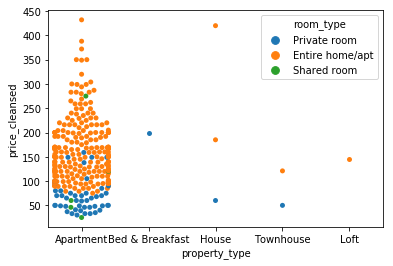

In [22]:
sns.swarmplot(x='property_type', y='price_cleansed', 
              hue='room_type', data=city)

To note:

- Categorical plots can pack a lot of complexity, but also a lot of insight
- The color of each dot is controlled by `hue`

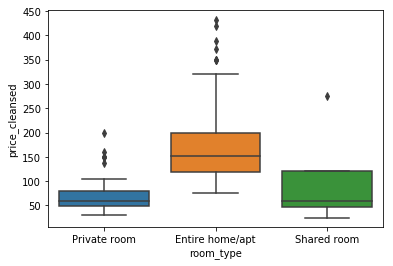

In [23]:
sns.boxplot(x='room_type', y='price_cleansed', data=city)

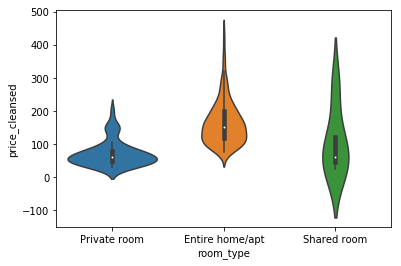

In [24]:
sns.violinplot(x='room_type', y='price_cleansed', data=city)

To note:

- Distribution abstractions help obtain a better picture of the distribution, when direct plotting becomes limited
- Two prominent examples are using inter-quartile ranges (`boxplot`) or KDE's (`violinplot`)

**Exercise**

Explore the distribution of:

* The review scores for rating (rvs)
* The rvs and room/property type

## Choropleths

### A note on color

#### Sequential

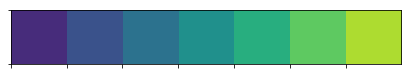

In [25]:
sns.palplot(sns.color_palette('viridis', 7))

#### Divergent

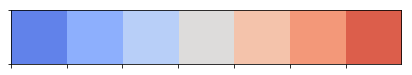

In [26]:
sns.palplot(sns.color_palette('coolwarm', 7))

#### Categorical

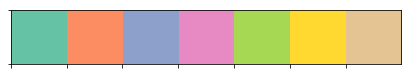

In [27]:
sns.palplot(sns.color_palette('Set2', 7))

### Mapping data

In [28]:
rs = ['review_scores_rating',
      'review_scores_accuracy',
      'review_scores_cleanliness',
      'review_scores_checkin',
      'review_scores_communication',
      'review_scores_location',
      'review_scores_value']
neis_db = db.groupby('neighbourhood_cleansed')\
            [rs]\
            .mean()

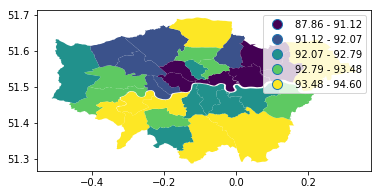

In [29]:
neis.join(neis_db, on='neighbourhood')\
    .plot(column='review_scores_rating',
          scheme='quantiles', 
          cmap='viridis', legend=True);

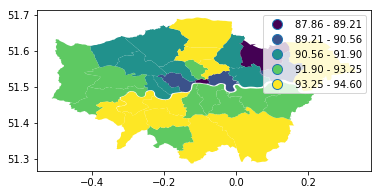

In [30]:
neis.join(neis_db, on='neighbourhood')\
    .plot(column='review_scores_rating',
          scheme='equal_interval', 
          cmap='viridis', legend=True);

To note:

* Obtain average values per neighbourhood and join them to geometries
* `plot` accepts `column`
* 1-D classiffication, the algorithm makes a difference (why?)

In [31]:
neis_db_std = (neis_db - neis_db.mean()) / neis_db.std()

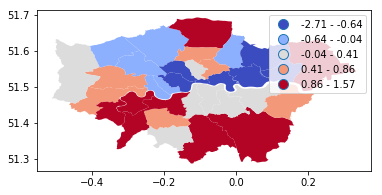

In [32]:
neis.join(neis_db_std, on='neighbourhood')\
    .plot(column='review_scores_rating',
          scheme='quantiles', 
          cmap='coolwarm', legend=True);

In [33]:
max_type = db.groupby('neighbourhood_cleansed')\
             ['room_type']\
             .describe()

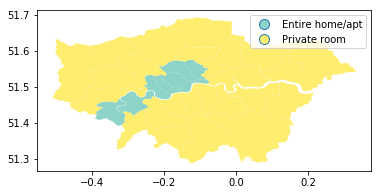

In [34]:
neis.join(max_type, on='neighbourhood')\
    .plot(column='top',
          categorical=True, 
          cmap='Set3', legend=True);

In [35]:
max_type

,count,unique,top,freq
neighbourhood_cleansed,,,,
Barking and Dagenham,142,3,Private room,99
Barnet,1012,3,Private room,612
Bexley,115,3,Private room,78
Brent,1609,3,Private room,876
Bromley,391,3,Private room,266
Camden,3761,3,Entire home/apt,2322
City of London,306,3,Entire home/apt,252
Croydon,553,3,Private room,381
Ealing,1003,3,Private room,575


To note:

* Standardisation makes a dataset divergent by definition
* Applying `describe` to a categorical variable
* Map of majority of type

## Advanced concepts

### Multiplot figures

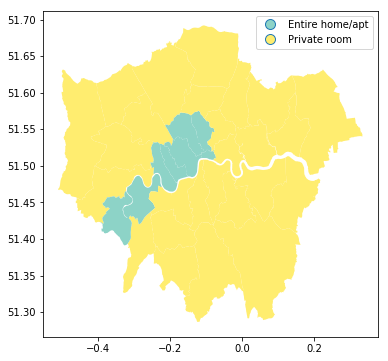

In [36]:
f, ax = plt.subplots(1, figsize=(6, 6))
neis.join(max_type, on='neighbourhood')\
    .plot(column='top',
          categorical=True, 
          cmap='Set3', legend=True,
          ax=ax);

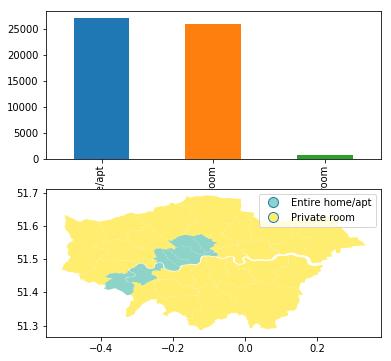

In [37]:
f, ax = plt.subplots(2, figsize=(6, 6))

rt_count.plot.bar(ax=ax[0])

neis.join(max_type, on='neighbourhood')\
    .plot(column='top',
          categorical=True, 
          cmap='Set3', legend=True,
          ax=ax[1]);

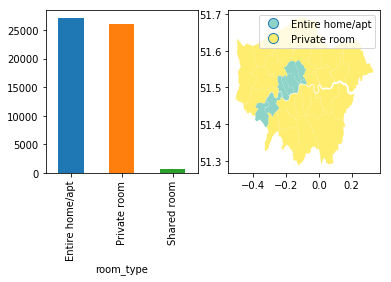

In [38]:
f, ax = plt.subplots(1, 2, figsize=(6, 3))

rt_count.plot.bar(ax=ax[0])

neis.join(max_type, on='neighbourhood')\
    .plot(column='top',
          categorical=True, 
          cmap='Set3', legend=True,
          ax=ax[1]);

To note:

* Embed a plot into an axis (`ax`)
* Set up an image with more than one axis (`ax` now an array)
* Control arrangement with `plt.subplots`

### Facetting

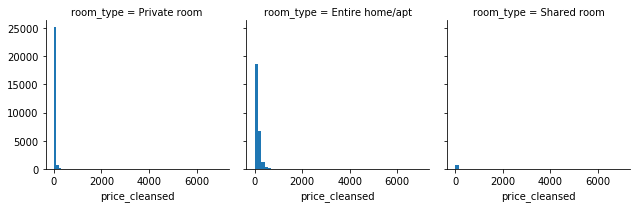

In [39]:
g = sns.FacetGrid(col='room_type', data=db)
g.map(plt.hist, 'price_cleansed', bins=50);

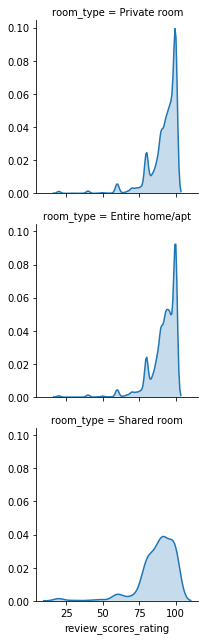

In [40]:
g = sns.FacetGrid(row='room_type', data=db)
g.map(sns.kdeplot, 'review_scores_rating', shade=True);

To note:

- Create a grid of plots based on data ("data-aware"), then populated based on other data
- `g.map` as `apply`

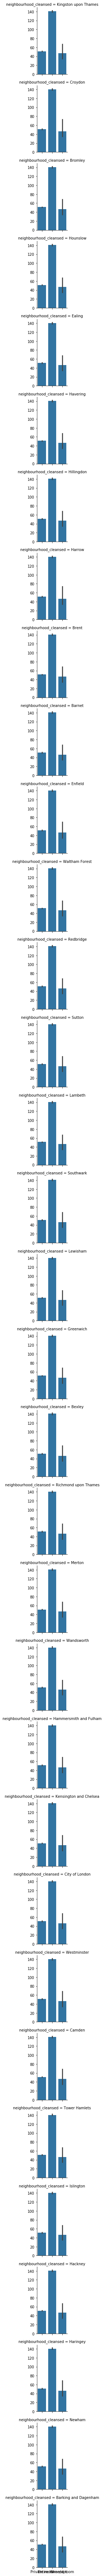

In [41]:
g = sns.FacetGrid(row='neighbourhood_cleansed', data=db)
g.map(sns.barplot, x='room_type', y='price_cleansed', 
      order=['Private room', 'Entire home/apt', 'Shared room'],
      data=db);

**Exercise**

* Create a grid based on room type and/or property and display their geographic location
* Explore creating a grid with rows and columns

In [ ]:
g = sns.FacetGrid(row='neighbourhood_cleansed', data=db)
g.map(sns.barplot, x='room_type', y='price_cleansed', 
      order=['Private room', 'Entire home/apt', 'Shared room'],
      data=db);